# A brief data exploration

In this tutorial we try to explore our data in some specific aspects (out of many possible ones). 


Prepared by Mina Jamshidi (https://github.com/minajamshidi/) for Machine Learning Workshop at IMPRS NeuroCom Retreat 11/2019, joint work with Kornelius Podranski.

For this exercise we extended the freely available "phenotypical" measures (like psychiatric scores) table from the Autism Brain Imaging Data Exchange (ABIDE). More precisely we added cortical thickness measures for different brain regions extracted by ANTs from subjects T1w MRI scans (http://preprocessed-connectomes-project.org/abide/download.html#ants-cortical-thickness-url-templates).  The Meaning of the headers is described here: http://fcon_1000.projects.nitrc.org/indi/abide/ABIDE_LEGEND_V1.02.pdf The columns to the right labeled Mean_nnnn are the thickness measures for different cortical regions.

In [94]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from matplotlib import cm as cm

First we load the data and normalize it.

In [88]:
data_pd = pd.read_csv('Phenotypic_V1_0b_preprocessed1_extended.csv')
x = data_pd.iloc[:, 108:206].to_numpy()
y = data_pd.loc[:, ['SEX']].to_numpy()

labels = np.unique(y)
labels_name = ['male', 'female']
# scale the features
scaler = StandardScaler()
x_n = scaler.fit_transform(x)

### Curse of dimensionality ...
For using machine learning methods, we need the feature matrix to be (n_observations x n_features) and the labels to be a vector of dimension (n_observations x 1). 
It is worth noting that, it is necessary to have more observations than the number of features. This is usually refered to as the curse of dimensionality problem. 
Note that the case of n_observations<n_features is usually called small sample size problem and there are methods to address this problem and increase the efficiency of the machine learning pipeline in the presence of small sample size.

In [89]:
n_obs, n_fea = x.shape
print(' number of observations=%d\n number of features=%d\n'%(x.shape))

 number of observations=1035
 number of features=97



### Number of data points in each classes

Now let's look at the number of data points in each class:

In [17]:
n_class1 = np.sum(y == labels[0])
n_class2 = np.sum(y == labels[1])
ratio1 = n_class1/n_obs
print(' number of male participants = %d\n number of female participants = %d\n' %(n_class1, n_class2))
print('ratio of class1/n_obs = %.2f\n' %ratio1)

 number of male participants = 878
 number of female participants = 157

ratio of class1/n_obs = 0.85



The classes are unballanced, meaning that such the number of subjects in one of the classes are much more than the other class. In these cases the classifier is in favor of the class with more data points (unless the classes are well seprable). In our case 85% of all data points belong to class1. That means if we classify all the subjects as class1, we will have accuracy of 85%! 
As a summary, one should be aware of the ratio of class members to be able to interprete the accuracy values. Note that it is usually recommended to look at receiver operating characteristic curve (ROC) and accuracy of classification of each class.

### Distribution of feaures in each class
Another step you may take sxploring your data is to look at the distribution of the features in each class:

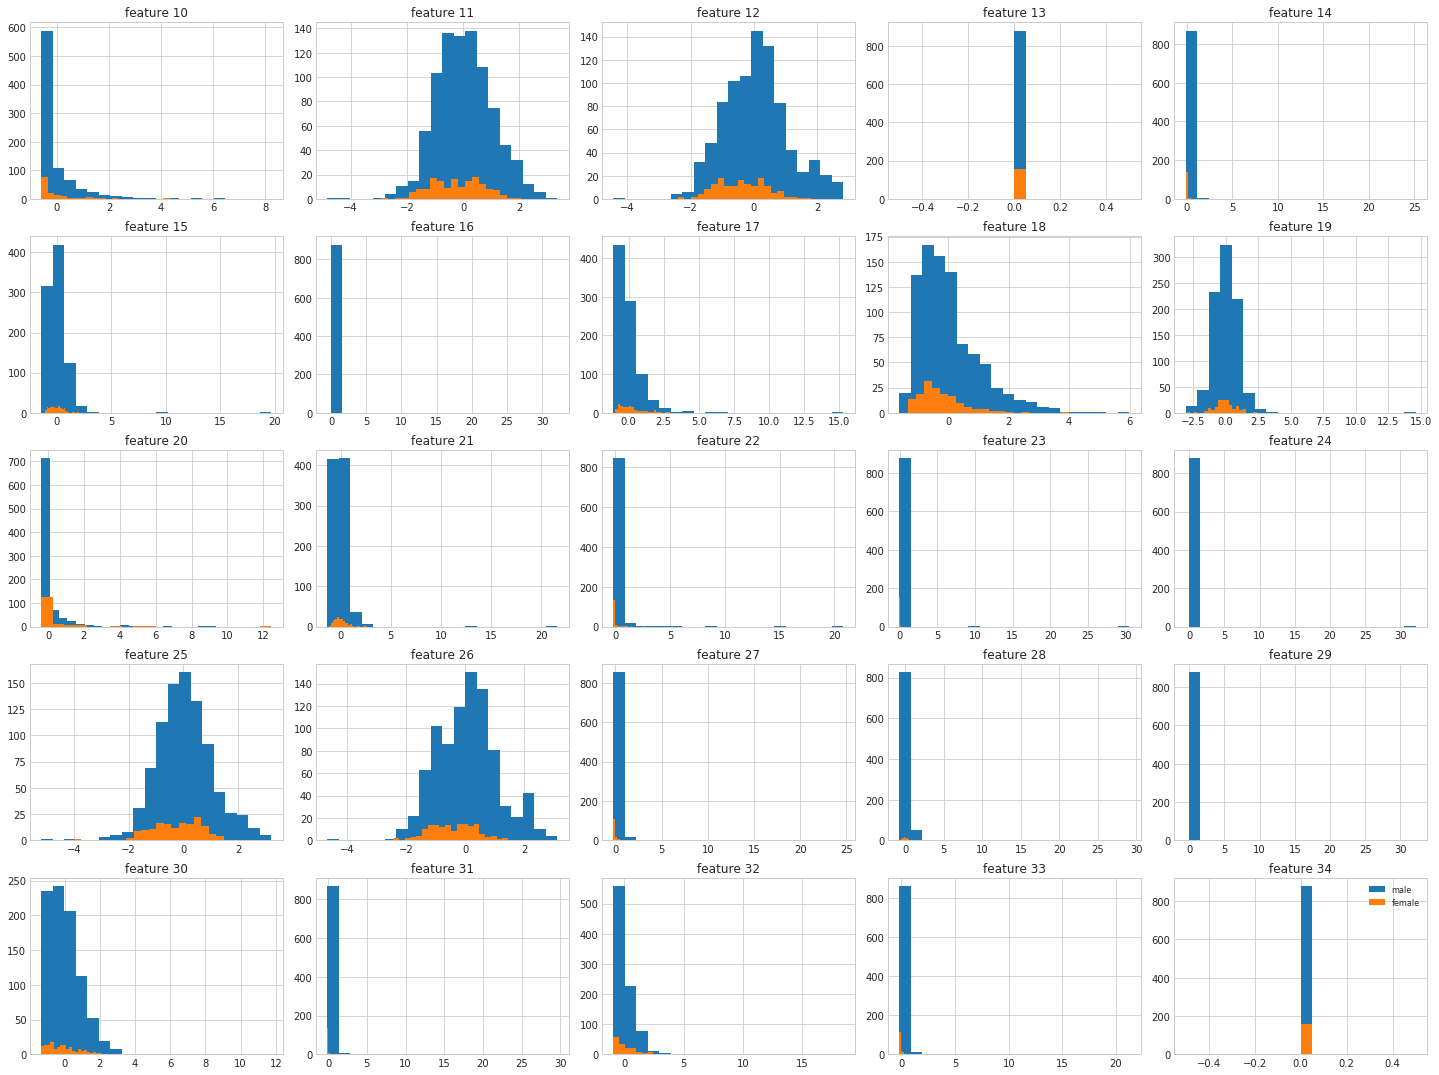

In [90]:
n1_sp, n2_sp = 5, 5
n_sp = n1_sp * n2_sp
fea_plt = np.array([10, 70]) # the index of features to be depicted
n_fea_plt = np.diff(fea_plt)[0] + 1
if n_fea_plt > n_sp:
    fea_plt[1] = fea_plt[0] + n_sp - 1 
    n_fea_plt = n_sp
fea_no = np.arange(fea_plt[0], fea_plt[1]+1)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(20,15))
    for cnt in range(n_fea_plt):
        plt.subplot(n1_sp, n2_sp, cnt+1)
        for lab_n in range(len(labels)):
            ind = np.where(y == labels[lab_n])[0]
            plt.hist(x_n[ind, fea_no[cnt]], bins=20, label=labels_name[lab_n])
        plt.title('feature ' + str(fea_no[cnt]))
    plt.legend(loc='upper right', fancybox=True, fontsize=8)
    plt.tight_layout()


We see that the distributions of the features in the two classes are almost similar. This can make the classification harder. 

Additionaly, it is good to look at the covariance matrix of the data. It can give us an overview of how much the features are explained by each other.

Text(0.5, 1.05, 'Covariance matrix of the features')

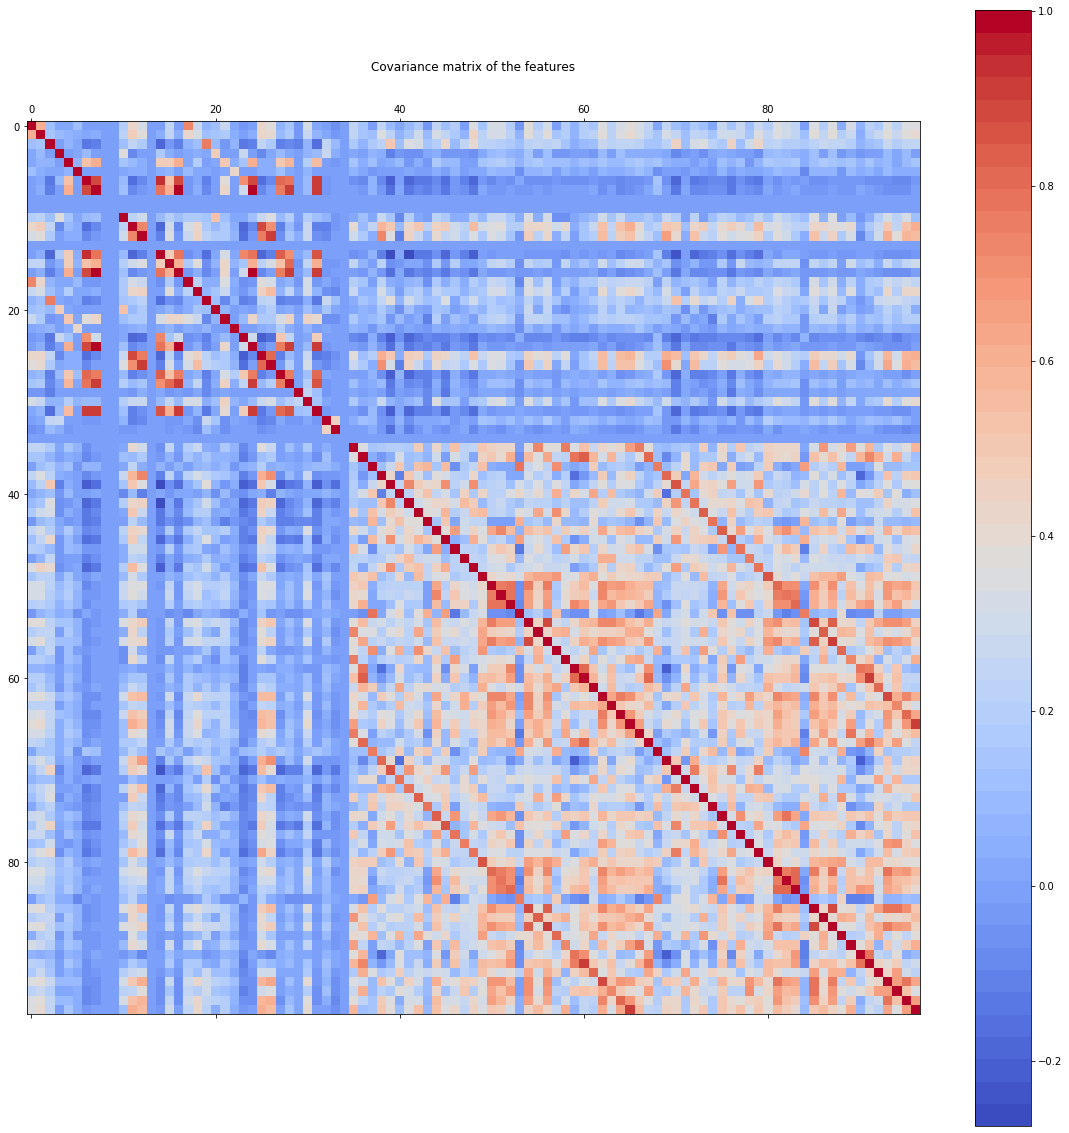

In [100]:
cov_mat = np.cov(x_n.T)
plt.figure(figsize=(20,20))
cmap = cm.get_cmap('coolwarm', 50)
plt.matshow(cov_mat, cmap=cmap, fignum=1)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Covariance matrix of the features')